##  WEBSCRAPING AND TEXTMINING

### Álvaro Kothe
### Mathews Lisboa

<img src="https://veja.abril.com.br/wp-content/uploads/2018/01/bbb-globo.jpg" width="800">


# Introdução


- O trabalho tem como enfoque aplicar a técnica de *Web Scraping*, ou em português, raspagem de dados. A técnica consiste em uma coleta de dados de um portal da web, de sites, nos quais são usados scripts para coletar informações que poderão ser usadas para futuras análises. Um exemplo comum de *Web Scraping* na atualidade é em relação ao Twitter, visto que a rede social contém calorosas discussões a respeito dos mais diversos assuntos e pode ser utilizado para determinar a opinião pública a respeito. Porém, o *Web Scraping* é responsável apenas pela coleta dos dados, para realiza uma análise em um conjunto de texto não estruturado é utilizado o *Text Mining*, dessa forma, pode-se transformar os dados coletados da rede social em informações plausíveis de análise. 

- Considerando a introdução as ferramentas, um dos tópicos mais discutidos no *twitter* no Brasil é o *reality show* Big Brother. Sendo assim, foi decidido entre o grupo que uma boa aplicação dessas ferramentas seria realizar uma raspagem de dados no *twitter* em relação ao termo “bbb21”, coletando assim informações de usuários a em torno desse termo. Dito isso, foi coletado 76932 *tweets* de usuários entre os dias 23 e 26 de abril, com o dia 25 de pausa dada as limitações da API.

- O objetivo do trabalho é desenvolver as técnicas citadas anteriormente que estão relacionadas ao curso ministrado, assim tornando possível a extração de informações dos usuários do *twitter* utilizando uma API do *twitter* desenvolvedor e realizar as análises descritivas, nuvem de palavras e análise de sentimentos, a fim de tentar caracterizar popularidade dos candidatos em relação aos usuários. 


# Metodologia

## Coleta dos Tweets

Foi utilizado a API do twitter developper utilizando a ferramenta de busca dela.Essa API limita a realizar uma coleta de até uma semana com um limite de tweets buscados
		por hora, que seria aproximadamente 180 buscas.
		Em razão disso, a coleta foi feita em 3 dias, sendo eles 23, 24 e 26 de Abril. O que acabou totalizando
		em aproximadamente 77 mil tweets nesses 3 dias. As principais informações coletadas foram
		a data do tweet, o texto, número de favoritos e número de retweets.
        O código para a coleta está disponível no [github](https://github.com/Alvaro-Kothe/Trabalho_CE2/blob/master/puxa_tweetV2.py), o qual o link encontra-se na conclusão.
        

## Tratamento

Foi feito um tratamento no texto removeu-se caracteres especiais, emojis, formatou para caixa
	baixa. Além disso, removeu-se palavras de conexão, chamadas de stopwords, pois essas apareceriam muito.
	Por exemplo as palavras: Que, A, O , do , Da, pois, em e etc. O código para o tratamento dos dados encontra-se no [github](https://github.com/Alvaro-Kothe/Trabalho_CE2/blob/master/src/tratamento_string.py) no link disponível na conclusão.

# Análise

## Lendo os dados

In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from src import tratamento_string, candidatos
import pandas as pd
import time 



tweets = pd.read_csv("tweets_bbb21.csv")

tweets['tweet_chave'] = tweets.apply(lambda linha: tratamento_string.normalize(linha['texto']), axis=1)
tweets['ind_candidato'] = tweets.apply(lambda linha: candidatos.dicionario_candidato(linha['texto']), axis=1)
tweets['sentimento'] = tweets.apply(lambda  linha: candidatos.soma_sentimento(linha['tweet_chave']), axis =1)
# tweets = tweets.join(pd.DataFrame(tweets.pop('ind_candidato').tolist()))

## WordCloud

 A análise realizada foi uma contagem de palavras de todos os tweets e verifica-se a palavra mais popular,
	e coloca-se num gráfico em que o tamanho da palavra é proporcional a sua contagem.

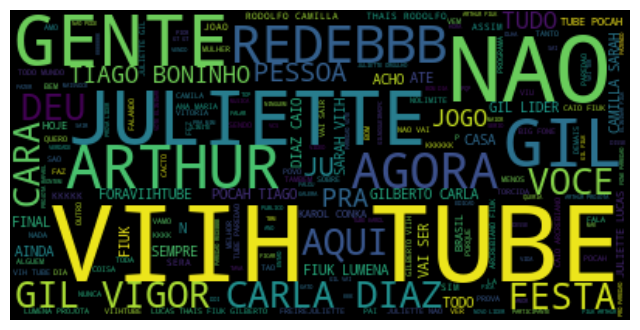

In [2]:
texto = tweets['tweet_chave'].str.join(' ')
tt = ' '.join(texto).upper()
wordcloud = WordCloud().generate(tt)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(8, 6), dpi=100)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

É notável que os assuntos mais falados pelos usuários no período de coleta dos dados são, Juliette, Viih Tube, Gil, redebbb, Arthur, Carla Diaz e Gente. Dessas palavras, pode-se notar que 5 são referentes aos nomes dos candidatos do programa. 


# Análise de Sentimento


Foi baixado um dicionário, tratado para ser facilmente lido em python, em que basixamente atribui-se uma nota
	a cada palavra escrita. E o sentimento é a soma dessas notas. O dicionário baixado enontra-se no diretório no [github](https://github.com/Alvaro-Kothe/Trabalho_CE2/tree/master/SentiLex-PT02).

In [3]:
tweets['criado_em'] = pd.to_datetime(tweets['criado_em'])
agrupados = tweets.groupby(tweets.criado_em.dt.floor('H')) 
sent_hora = agrupados.sentimento.sum()

### Gráfico de Sentimento por Hora

Para a formulação desse gráfico foi feito uma agregação dos tweets por hora e dia, assim, realizando a soma dos sentimentos por hora.

<AxesSubplot:xlabel='Data de Criação', ylabel='Sentimento'>

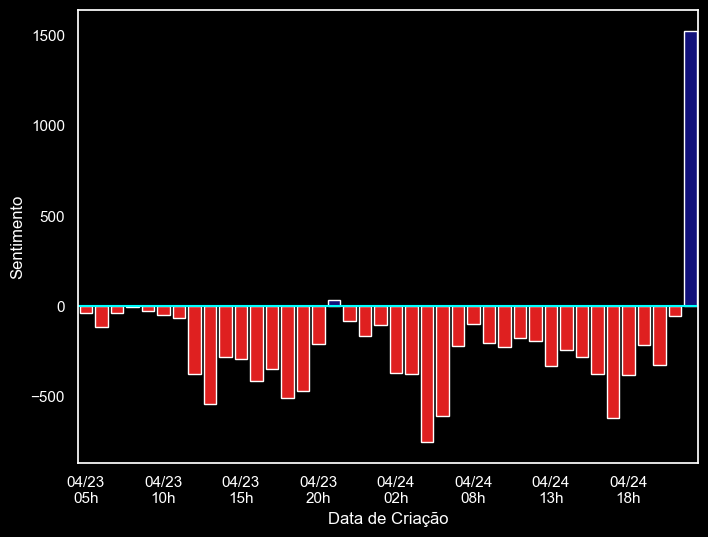

In [12]:
plt.figure(figsize=(8, 6), dpi=100)
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black','axes.labelcolor':'white',
           'ytick.color':'white', 'xtick.color':'white','grid.color':'black'})


clrs = ['darkblue' if (x > 0) else 'red' for x in sent_hora ]

ax = sns.barplot(x = sent_hora.index, y = sent_hora, palette = clrs)
ax.set_xticklabels([t.strftime("%m/%d\n%Hh") if not i%5 else "" for i,t in enumerate(sent_hora.index)], rotation=0)
ax.axhline(0, color='cyan')
ax.set_xlabel('Data de Criação')
ax.set_ylabel('Sentimento') 

ax



Percebe-se pelo gráfico que há uma maioria de horários o sentimento dos usuários é negativo. A maior excesão é no último horário de coleta que ocorre durante as 2 da manhã do dia 26 de Abril. 

### Gráfico de Sentimento por Candidato

Para a realização desse gráfico foi feito uma pesquisa se o candidato era citado no tweet e somou-se o sentimento dos tweets em que foi citado.

In [5]:
sentimento_candidato = {}
for i, linha in tweets.iterrows():
    for k,v in linha["ind_candidato"].items():
        if v:
            sentimento_candidato[k]=sentimento_candidato.get(k,0) + linha['sentimento']


<AxesSubplot:>

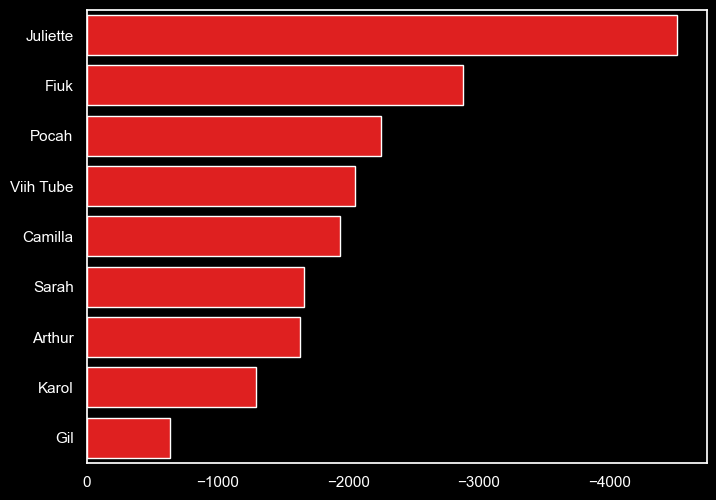

In [6]:

sentimento_candidato = dict(sorted(sentimento_candidato.items(), key=lambda item: item[1]))

plt.figure(figsize=(8, 6), dpi=100)


ax = sns.barplot(y = list(sentimento_candidato.keys()), x = list(sentimento_candidato.values()), color ='red')

ax.invert_xaxis()
ax


Percebe-se pelo gráfico que não há um candidato que tenha sentimento positivo no geral. Vale ressaltar que o candidato Gil, mesmo que seja muito falado como visto na Wordcloud, ainda possui o menor o sentimento negativo, porém  é o menor entre os outros candidatos. A Juliette, por mais que seja a finalista do programa, é a com o maior sentimento negativo entre os outros candidatos. Isso se deve em parte por ser a mais falada entre os candidatos.

# Análise Descritiva de Favoritos e Retweets

Utilizando a mesma pesquisa do sentimento por candidat, o foi feito a soma de favoritos e 
	retweets dos candidatos em tweets que foram citados.

In [7]:
favoritos_candidato = {}
for i, linha in tweets.iterrows():
    for k,v in linha["ind_candidato"].items():
        if v:
            favoritos_candidato.setdefault(k,[0,0])
            favoritos_candidato[k][0]+=linha['qnt_favoritos']
            favoritos_candidato[k][1]+=linha['qnt_retweets']
            
            

In [8]:
favoritos_candidato = dict(sorted(favoritos_candidato.items(), key=lambda item: item[1][0],reverse=True))

### Gráfico de Favoritos por Candidato

<AxesSubplot:>

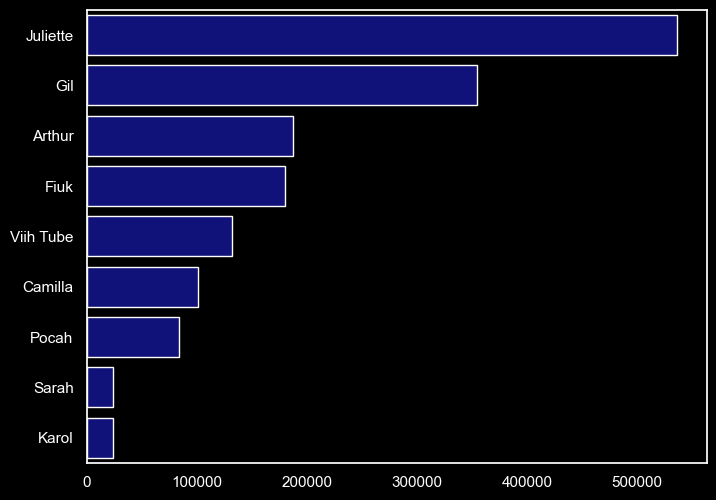

In [9]:
favoritos, retweets = map(list, zip(*list(favoritos_candidato.values())))
candidatos = list(favoritos_candidato.keys())

plt.figure(figsize=(8, 6), dpi=100)

ax = sns.barplot(y = candidatos, x = favoritos, color ='darkblue')

ax

Observa-se que a Juliette possui o maior número de favoritos em relação aos demais candidatos, seguida pelo Gil. 
A Karol e Sarah são as candidatas que possuíram os menores números de favoritos em relação aos outros candidatos, justamente por terem sido eliminadas antes do período de coleta. Porém é interessante que amabas as candidatas ainda apareçam na coleta mesmo depois de semanas após as suas eliminações.

### Gráfico de Retweets por Candidato

In [10]:
candidatos, retweets=map(list, zip(*list(sorted(zip(retweets,candidatos),reverse = True))))

<AxesSubplot:>

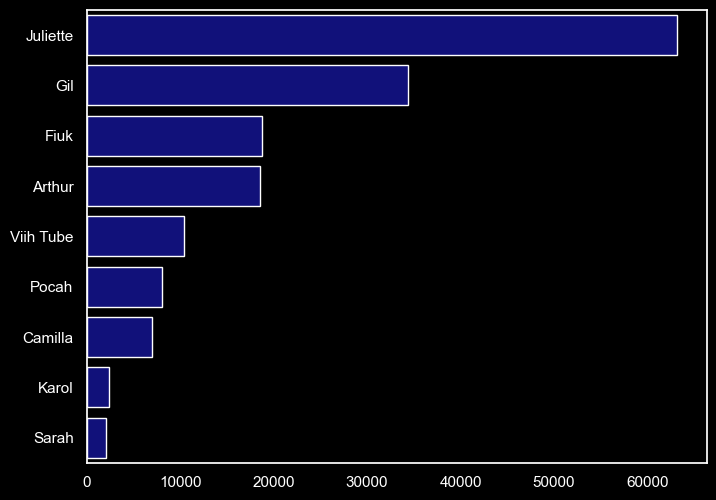

In [14]:

plt.figure(figsize=(8, 6), dpi=100)

ax = sns.barplot(y = retweets, x = candidatos, color ='darkblue')

ax

Observa-se um padrão semelhante ao caso do gráfico de favoritos por candidato. O Arthur e o Fiuk trocam de posição entre si e o mesmo ocorre entre as duplas Camilla e Pocah, Karol e Sarah. A Juliette permace com o maior número de retweets seguida pelo Gil, assim como ocorre com os favoritos.

# Considerações finais

- Encontrou-se dificuldades na obteção dos tweets pela limitação da API do twitter de apenas uma semana. O que resultou em uma análise com apenas três dias.


- Seguindo os resultados da análise verifica-se que o principal tema dos tweets são os candidatos remanescentes no programa.


- Considerando-se a análise de sentimento, existe um padrão de toxicidade entre os usuários do twitter que é observavel na análise temporal dos três dias de coleta. Econtra-se um padrão no qual a candidata Juliette, além de mais comentada entre os usuários ainda possuiu a maior mídia no twitter, o que pode ter sido um fator decisivo para sua vitória no *reality show*.

- Os códigos para puxar os tweets e realizar os principais tratamentos no texto se encontram no repositório: 
    https://github.com/Alvaro-Kothe/Trabalho_CE2